In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from knn_classifier import KNNClassifier
from os import sys
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# KNN Classifier

In [1]:
import numpy as np
import scipy.stats as stats
from os import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




#Define functions for calculating distances
def Euclidean(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2,axis=1))

def Manhattan(x, y):
    return np.sum(np.abs(np.array(x) - np.array(y)),axis=1)
            


#Define knn class
class KNNClassifier():
    def __init__(self, k=3, distance_metric='Euclidean'):
        self.k = k
        self.distance_metric = distance_metric


    #Define fit function
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #define predict function
    def predict(self, X):
        labels = np.zeros(len(X[:, 1])) #For saving labels
        for i in range(len(X[:, 1])):
            
            #These calculate distances between 8th dimension X[i] point and all points on X_train
            if self.distance_metric == 'Euclidean':
                distance = Euclidean(self.X_train, X[i].reshape(1,8))  
                
            elif self.distance_metric == 'Manhattan':
                distance = Manhattan(self.X_train, X[i].reshape(1,8))

            else:
                raise ValueError("No such a defined distance metric")
            
            k_indices = np.argsort(distance)[:self.k] #Gives indices of minimum distances
            k_classes = self.y_train[k_indices] #Gives labels of minimum distances
            mode = stats.mode(k_classes) #Which label is the most in neighbors?
            labels[i] = mode[0] # Predicted label for X[i] point
            

        return labels

# QUESTION 1

In [2]:
df=pd.read_csv('htru2.csv')
df

,pmean,pstd,pskew,pkurt,dmean,dstd,dskew,dkur,ispulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
X=df.drop('ispulsar',axis=1).to_numpy()
y=df['ispulsar'].to_numpy()

column_labels = df.columns.tolist()
ex_label='pmean'

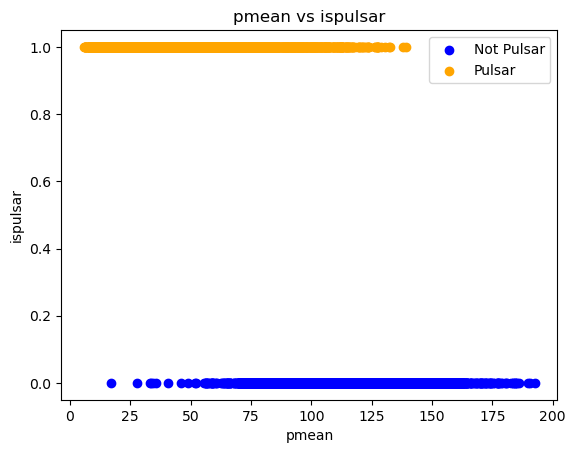

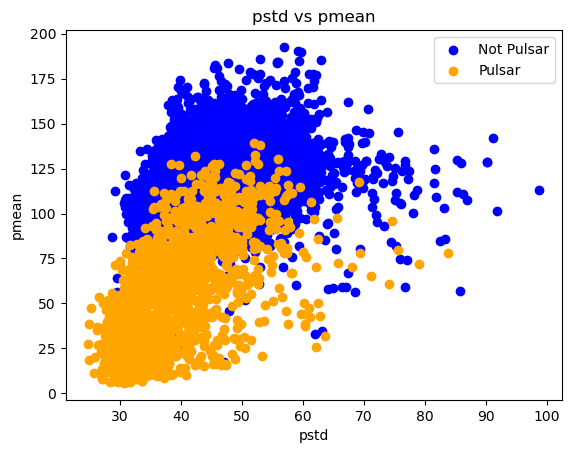

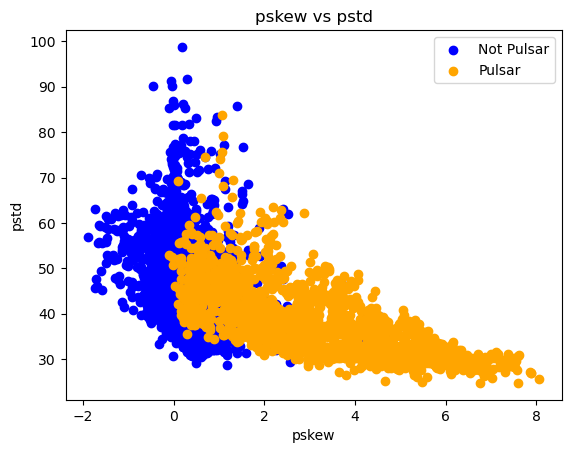

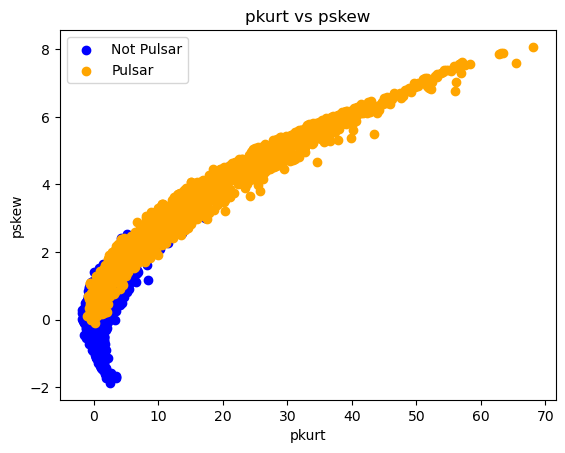

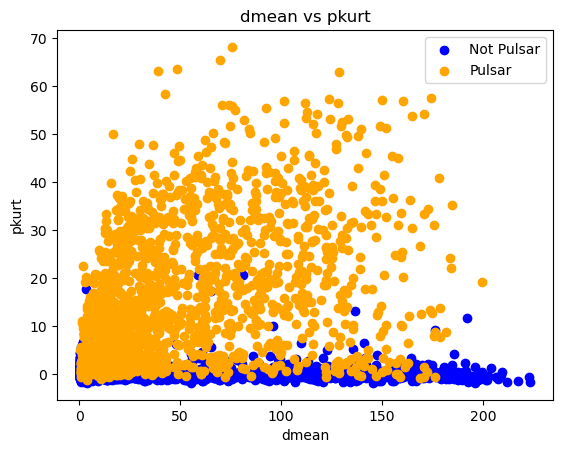

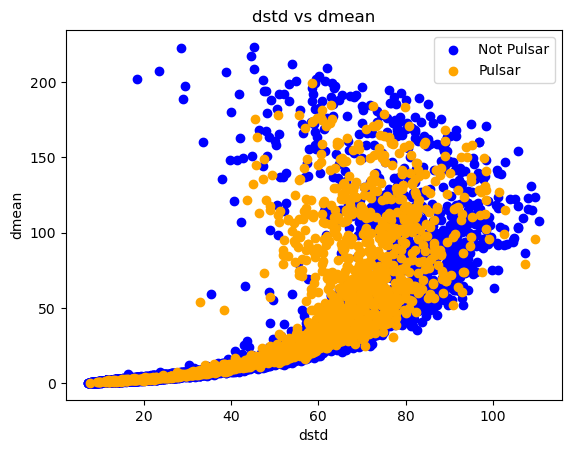

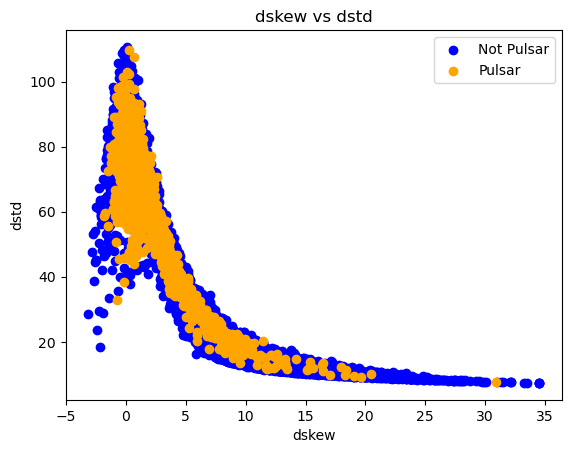

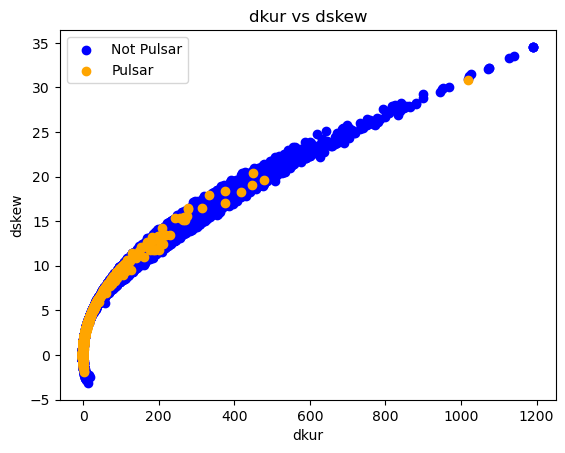

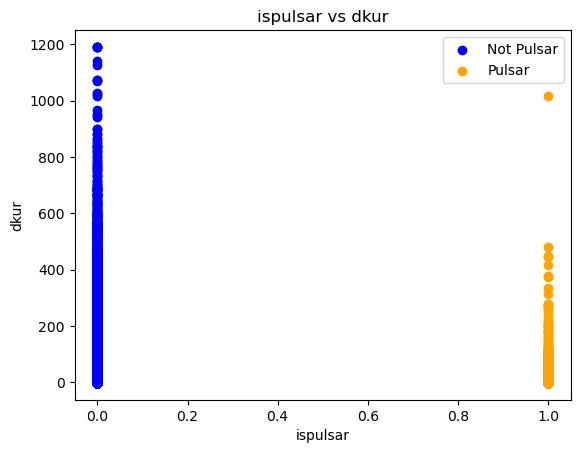

In [27]:
for label in column_labels:

    
    blue_ex = df[ex_label][df['ispulsar'] == 0]
    orange_ex = df[ex_label][df['ispulsar'] == 1]
    
    blue = df[label][df['ispulsar'] == 0]
    orange = df[label][df['ispulsar'] == 1]
    
    plt.scatter(blue, blue_ex, c='blue', label='Not Pulsar')
    plt.scatter(orange, orange_ex, c='orange', label='Pulsar')
    
    plt.xlabel(label)
    plt.ylabel(ex_label)
    plt.legend()
    
    plt.title(f'{label} vs {ex_label}')
    plt.show()

    ex_label = label

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=500,train_size=5000)

In [29]:
k_val=[3,5,7]

metrics=['Euclidean','Manhattan']
cms=[]
accs=[]
precisions=[]
recalls=[]
f1_scores=[]
for metric in metrics:
    for i in k_val:
    
        model=KNNClassifier(k=i,distance_metric=metric)
        model.fit(X_train,y_train)
        y_generated=model.predict(X_test)
        
        
        cm=confusion_matrix(y_test, y_generated)
        cms.append(cm)
        
        ac=accuracy_score(y_test,y_generated)
        accs.append(ac)
        print(f'Accuracy of Metric: {metric} and k Value: {i} is {ac}')
        
        precision = precision_score(y_test, y_generated)
        precisions.append(precision)
        

        recall = recall_score(y_test, y_generated)
        recalls.append(recall)
        

        f1 = f1_score(y_test, y_generated)
        f1_scores.append(f1)
        
        


Accuracy of Metric: Euclidean and k Value: 3 is 0.9745739033249511
Accuracy of Metric: Euclidean and k Value: 5 is 0.9745739033249511
Accuracy of Metric: Euclidean and k Value: 7 is 0.9734562727018721
Accuracy of Metric: Manhattan and k Value: 3 is 0.9745739033249511
Accuracy of Metric: Manhattan and k Value: 5 is 0.9754121262922604
Accuracy of Metric: Manhattan and k Value: 7 is 0.9740150880134115


### Due to the imbalance in the predicted ispulsar labels, with a significant number of zeros, our model may incorrectly perform well by consistently predicting zero values. Therefore, relying only on accuracy scores based on this imbalance could lead to inaccurate conclusions. We believe it is essential to consider additional information to better assess the model's performance.

Confusion Matrix of Metric: Euclidean and k Value: 3 
Precision of Metric: Euclidean and k Value: 3 is 0.9057971014492754
Recall of Metric: Euclidean and k Value: 3 is 0.7936507936507936
F1 Score of Metric: Euclidean and k Value: 3 is 0.8460236886632827

Confusion Matrix of Metric: Euclidean and k Value: 5 
Precision of Metric: Euclidean and k Value: 5 is 0.9117647058823529
Recall of Metric: Euclidean and k Value: 5 is 0.7873015873015873
F1 Score of Metric: Euclidean and k Value: 5 is 0.8449744463373083

Confusion Matrix of Metric: Euclidean and k Value: 7 
Precision of Metric: Euclidean and k Value: 7 is 0.9074074074074074
Recall of Metric: Euclidean and k Value: 7 is 0.7777777777777778
F1 Score of Metric: Euclidean and k Value: 7 is 0.8376068376068377

Confusion Matrix of Metric: Manhattan and k Value: 3 
Precision of Metric: Manhattan and k Value: 3 is 0.9087591240875912
Recall of Metric: Manhattan and k Value: 3 is 0.7904761904761904
F1 Score of Metric: Manhattan and k Value: 3 is 

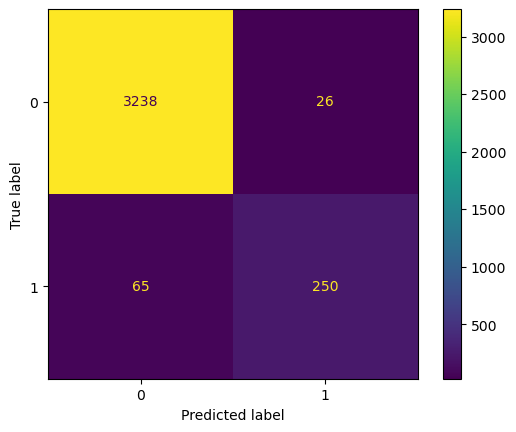

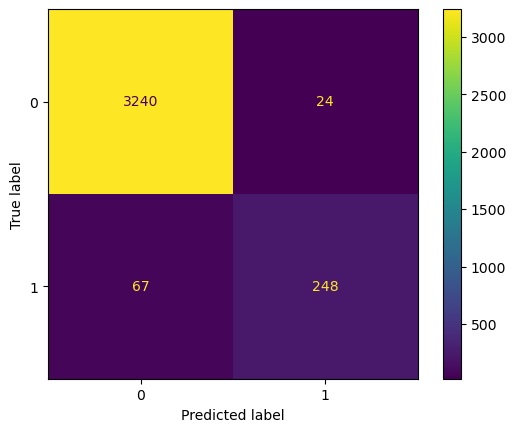

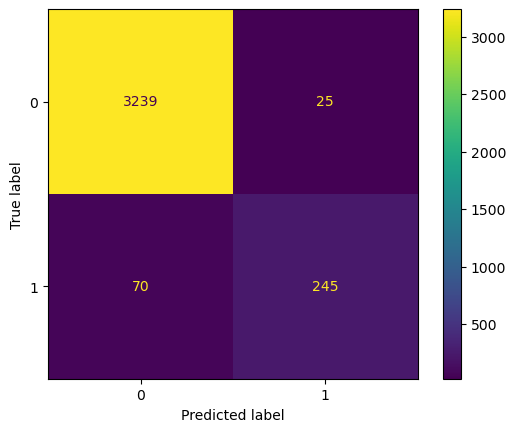

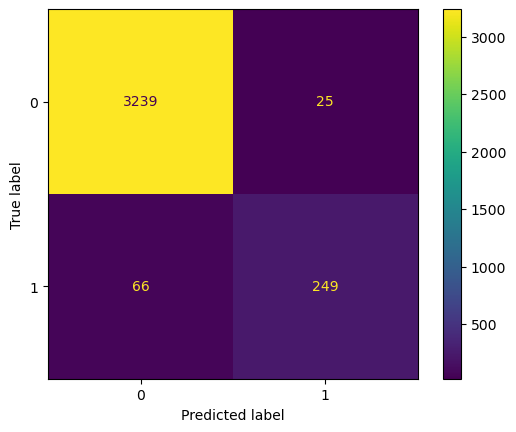

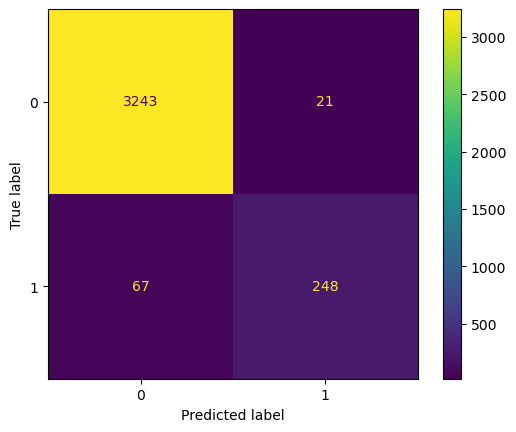

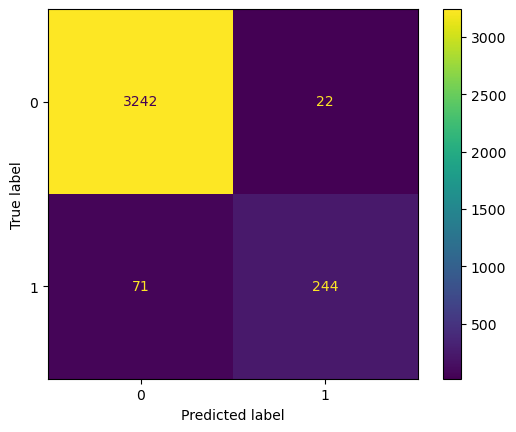

In [32]:
k=0
for metric in metrics:
    for i in k_val:
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cms[k])
        
        print(f'Confusion Matrix of Metric: {metric} and k Value: {i} ')
        disp.plot()
        
        print(f'Precision of Metric: {metric} and k Value: {i} is {precisions[k]}')
        print(f'Recall of Metric: {metric} and k Value: {i} is {recalls[k]}')
        print(f'F1 Score of Metric: {metric} and k Value: {i} is {f1_scores[k]}\n')
        k+=1
              



In [9]:
k_values = [ 1, 2, 3, 5, 10, 15, 20]
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mean_accuracies=[]
std_devs=[]
for k in k_values:
    print(f"Using k = {k}")
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(y_train.shape)
        # sys.exit()
        model=KNNClassifier(k=k,distance_metric='Euclidean')

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(accuracy)

    avg_accuracy = np.mean(accuracies)
    std_dev=np.std(accuracies)
    print(f"Average Accuracy: {avg_accuracy:.4f}\n")
    mean_accuracies.append(avg_accuracy)
    std_devs.append(std_dev)

Using k = 1
0.9608938547486033
0.9594972067039106
0.9653631284916201
0.9611623358480023
0.9645152277172394
Average Accuracy: 0.9623

Using k = 2
0.9717877094972067
0.9656424581005587
0.9712290502793296
0.968706342553786
0.9731768650461022
Average Accuracy: 0.9701

Using k = 3
0.9729050279329609
0.9692737430167597
0.9723463687150838
0.968706342553786
0.9745739033249511
Average Accuracy: 0.9716

Using k = 5
0.9745810055865922
0.9692737430167597
0.9737430167597766
0.968706342553786
0.9745739033249511
Average Accuracy: 0.9722

Using k = 10
0.976536312849162
0.970391061452514
0.9762569832402235
0.9703827884884045
0.9745739033249511
Average Accuracy: 0.9736

Using k = 15
0.9756983240223464
0.970391061452514
0.9754189944134078
0.9709416037999441
0.9734562727018721
Average Accuracy: 0.9732

Using k = 20
0.9756983240223464
0.9698324022346368
0.9754189944134078
0.9717798267672534
0.9742944956691814
Average Accuracy: 0.9734



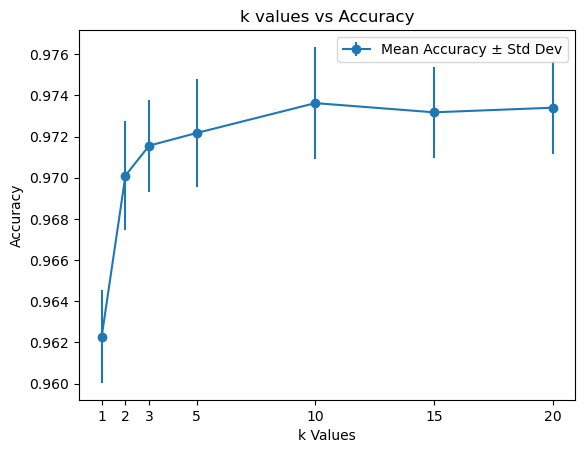

In [25]:
plt.errorbar(k_values, mean_accuracies, yerr=std_devs, fmt='o-', label='Mean Accuracy ± Std Dev')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.title('k values vs Accuracy')
plt.xticks(k_values)
plt.legend()
plt.show()

### According to this analysis, it appears that k=10 is the optimal choice among the other values.